In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy import create_engine, MetaData
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Numeric, Text, Float, ForeignKey
from sqlalchemy.orm import sessionmaker, relationship
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [2]:
df = pd.read_csv("db/blackfridat_rename.csv")

In [3]:
df.insert(0, 'new_id', range(1, 1+ len(df)))
df

,new_id,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1,1004023,P00000142,F,36-45,9,C,1,1,3,4.0,5.0,8390
1,2,1000876,P00114342,M,26-35,4,B,1,0,1,8.0,17.0,15496
2,3,1005365,P00053842,M,18-25,12,C,0,0,4,5.0,12.0,2138
3,4,1000285,P00108542,F,36-45,0,A,1,0,5,8.0,14.0,8663
4,5,1001373,P00196042,F,26-35,1,A,1,0,4,9.0,15.0,2846
5,6,1003075,P00057742,F,26-35,11,C,2,1,2,8.0,18.0,13318
6,7,1003641,P00046742,M,26-35,0,B,1,0,1,2.0,15.0,15455
7,8,1004004,P00063342,M,51-55,0,C,1,1,1,2.0,9.0,15628
8,9,1000245,P00066542,M,36-45,16,B,0,0,1,15.0,16.0,4031
9,10,1003399,P00243942,M,26-35,4,C,1,0,1,2.0,15.0,11979


In [4]:
# Create Engine
engine = create_engine("sqlite:///blackfriday.sqlite")

In [5]:
# df.set_index('new_id',inplace = False)

In [6]:
df.head()

,new_id,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1,1004023,P00000142,F,36-45,9,C,1,1,3,4.0,5.0,8390
1,2,1000876,P00114342,M,26-35,4,B,1,0,1,8.0,17.0,15496
2,3,1005365,P00053842,M,18-25,12,C,0,0,4,5.0,12.0,2138
3,4,1000285,P00108542,F,36-45,0,A,1,0,5,8.0,14.0,8663
4,5,1001373,P00196042,F,26-35,1,A,1,0,4,9.0,15.0,2846


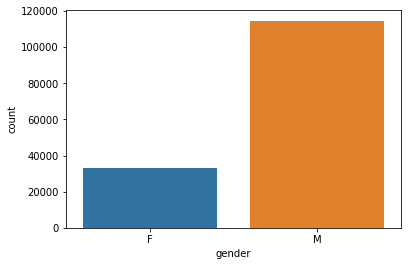

In [7]:
#is it true that female customers are highly dominant in comparison to male customers?
sns.countplot(df['gender'])
#plt.subplot(df['gender'])

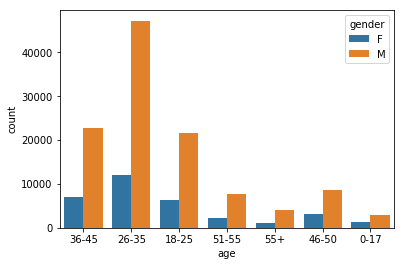

In [8]:
#distribution of gender variable, but taking into consideration the Age category(with defined hue parameter.)
sns.countplot(df['age'], hue=df['gender'])

In [9]:
df.describe()

,new_id,user_id,occupation,marital_status,product_category_1,product_category_2,product_category_3,purchase
count,147936.000000,1.479360e+05,147936.000000,147936.000000,147936.000000,147936.000000,147936.000000,147936.000000
mean,73968.500000,1.002999e+06,8.173494,0.402485,2.741760,6.894238,12.668248,11662.194327
std,42705.589049,1.720083e+03,6.484549,0.490400,2.573621,4.497650,4.125134,5083.023824
min,1.000000,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,36984.750000,1.001498e+06,2.000000,0.000000,1.000000,2.000000,9.000000,7871.000000
50%,73968.500000,1.003051e+06,7.000000,0.000000,1.000000,6.000000,14.000000,11757.000000
75%,110952.250000,1.004415e+06,14.000000,1.000000,4.000000,10.000000,16.000000,15627.000000
max,147936.000000,1.006040e+06,20.000000,1.000000,15.000000,16.000000,18.000000,23959.000000


In [10]:
# how many different products are sold
df['product_id'].nunique()

526

In [11]:
# how many different customers have bought something from the store
df['user_id'].nunique()

5854

In [12]:
# occupation type of each customer.
#  create the function to extract all different occupations
def unique(column):
    x = np.array(column)
    print(np.unique(x))
print("The unique ID numbers of customers occupations:")
unique(df['occupation'])

The unique ID numbers of customers occupations:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [13]:
#how much money each costumer group (grouped by occupation ID) spent.
occupations_id = list(range(0, 21))
spent_money = []
for oid in occupations_id:
    spent_money.append(df[df['occupation'] == oid]['purchase'].sum())

spent_money

[213384825,
 134362252,
 74993407,
 51870196,
 230642215,
 40980298,
 60996124,
 187550876,
 5816512,
 18388543,
 43166614,
 33660030,
 112705223,
 21428037,
 88969298,
 42144742,
 76906735,
 151563365,
 21144033,
 23752448,
 90832607]

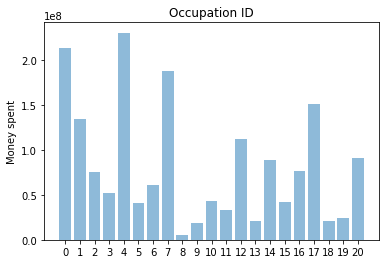

In [14]:
# how much money is spent per occupation category


objects = ('0', '1', '2', '3', '4', '5','6','7','8','9','10', '11','12', '13', '14', '15', '16', '17', '18', '19', '20')
y_pos = np.arange(len(objects))

plt.bar(y_pos, spent_money, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Money spent')
plt.title('Occupation ID')

plt.show()

In [15]:
# how many different cities 
df['city_category'].nunique()

3

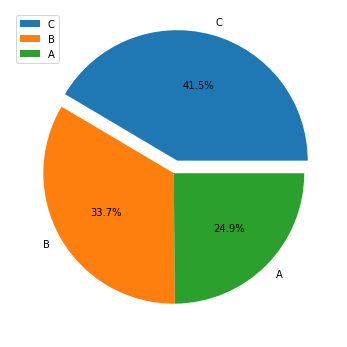

In [16]:
# what is the ratio of customers from each city.
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(11,6))
ax1.pie(df['city_category'].value_counts(), explode=explode, labels=df['city_category'].unique(), autopct='%1.1f%%')
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Images/most_desired_skills.png'

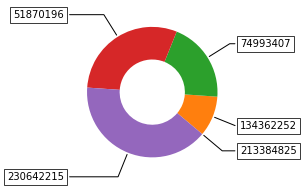

In [17]:
#Donut chart to display the most popular languages
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data = list(range(0, 5))
#occupations_id = list(range(0, 21))
#data = ['0', '1', '2', '3', '4', '5','6','7','8','9','10', '11','12', '13', '14', '15', '16', '17', '18', '19', '20']
#skill = [36-45,26-35,18-25,51-55]
skill = [213384825, 134362252, 74993407, 51870196, 230642215]
#, 40980298, 60996124]
#, 187550876, 5816512, 18388543, 43166614]
 #33660030,
 #112705223,
 #21428037,
 #88969298,
 #42144742,
 #76906735,
 #151563365,
 #21144033,
 #23752448,
# 90832607]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.75)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(skill[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

#ax.set_title("Most Desired Languages in the United States")

# Save an image of the chart and print it to the screen
#plt.savefig("Images/most_desired_skills.png")
plt.show()

In [ ]:
# Declare the base
Base = declarative_base()

In [ ]:
df.columns

In [ ]:
# pd.to_numeric(df.stay_in_current_city_years)

In [ ]:
df.info()

In [ ]:
# df.stay_in_current_city_years

In [ ]:
# Define ORM 
# Define the ORM class for `BlackFriday`
### BEGIN SOLUTION
class Blackfriday(Base):
    
    __tablename__ = 'blackfriday'
    new_id = Column(Integer, primary_key=True)
    user_id = Column(Integer)
    product_id = Column(Text)
    gender = Column(Text)
    age = Column(Text)
    occupation = Column(Integer)
    city_category = Column(Text)
    stay_in_current_city_years = Column(Text)
    marital_status = Column(Integer)
    product_category_1 = Column(Integer)
    product_category_2 = Column(Float)
    product_category_3 = Column(Float)
    purchase = Column(Integer)
    
    def __repr__(self):
        return f"id={self.new_id}"

In [ ]:
# Use Create all to crate the table 
Base.metadata.create_all(engine)

In [ ]:
# Verify the table name exists in db
engine.table_names()

In [ ]:
conn = engine.connect()

In [ ]:
# load csv 
csv_df = df

In [ ]:
# orient records does creates a list of data to write
data = csv_df.to_dict(orient='records')

In [ ]:
data

In [ ]:
# delete all rows in the table -- Optional
#conn.execute(blackfriday.delete())

In [ ]:
# delete all rows in the table -- Optional
conn.execute(Blackfriday.__table__.delete())

In [ ]:
# insert df into db as bulk
conn.execute(Blackfriday.__table__.insert(),data)

In [ ]:
# insert csv into db tabel
def populate_table(engine,table,csvfile):
    # connect
    conn = engine.connect()    
    

In [ ]:
# Use a basic query to validate that the data was inserted correctly for table `measurement`
### BEGIN SOLUTION
engine.execute("SELECT * FROM blackfriday LIMIT 1").fetchall()
### END SOLUTION